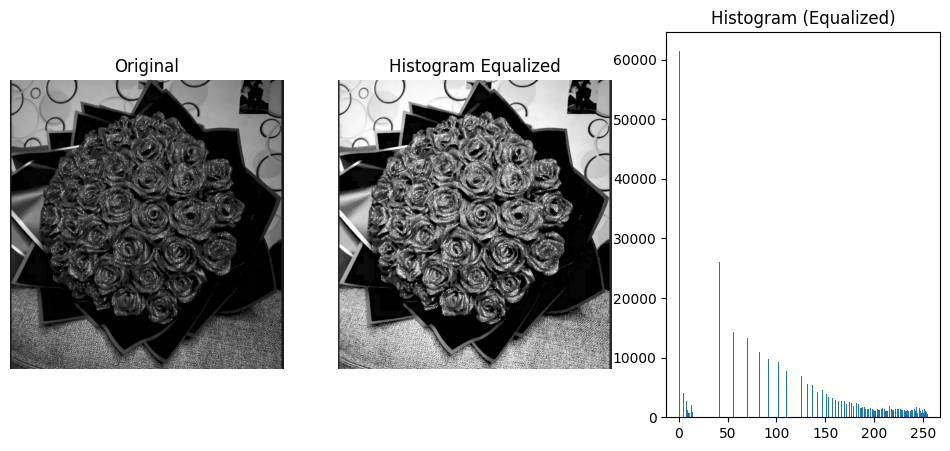

In [ ]:
#Point Processing
#Histogram Equalization

import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread("/content/sample_data/Screenshot 2025-12-13 110820.png", 0)

# Apply Histogram Equalization
he_img = cv2.equalizeHist(img)

# Display results
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Histogram Equalized")
plt.imshow(he_img, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Histogram (Equalized)")
plt.hist(he_img.ravel(), 256)
plt.show()


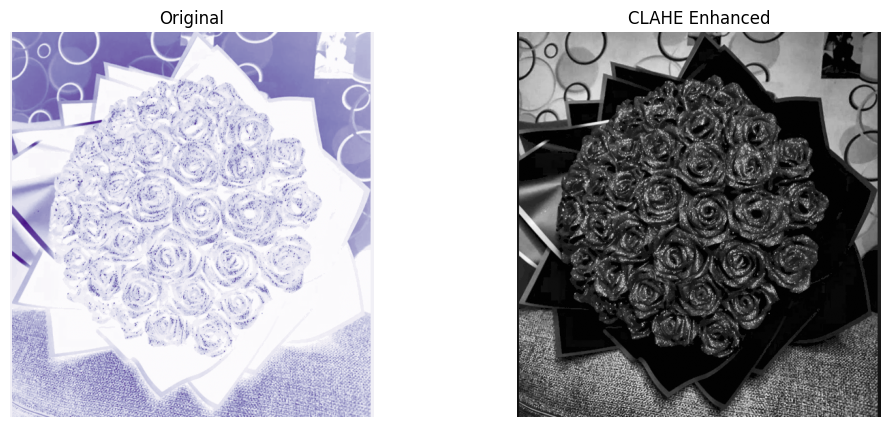

In [ ]:
#Point Processing
#CLAHE
import cv2
import matplotlib.pyplot as plt1
# Load grayscale image
img = cv2.imread("/content/sample_data/Screenshot 2025-12-13 110820.png", 0)
# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# Apply enhancement
clahe_img = clahe.apply(img)
# Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img,cmap='Purples')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("CLAHE Enhanced")
plt.imshow(clahe_img, cmap='gray')
plt.axis("off")

plt.show()


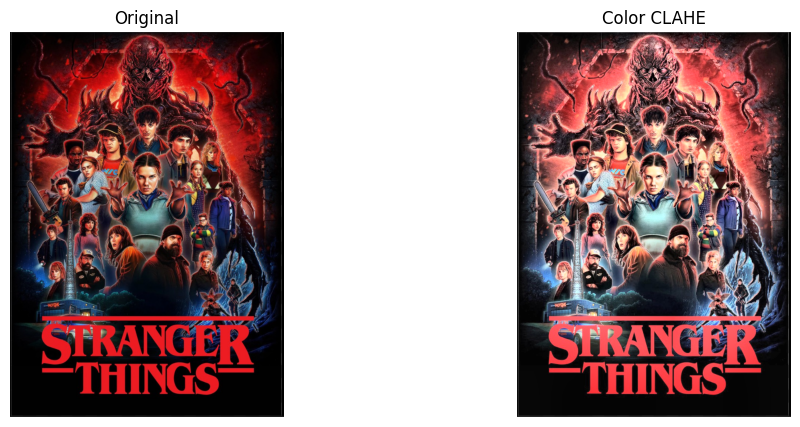

In [ ]:
#Point Processing
#color Enhancement
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/sample_data/Screenshot 2025-12-20 111233.png")
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# Split Y, Cr, Cb
Y, Cr, Cb = cv2.split(img_ycrcb)
# CLAHE on Y channel
clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
Y_clahe = clahe.apply(Y)
# Merge & convert back
img_clahe = cv2.merge((Y_clahe, Cr, Cb))
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YCrCb2BGR)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Color CLAHE")
plt.imshow(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


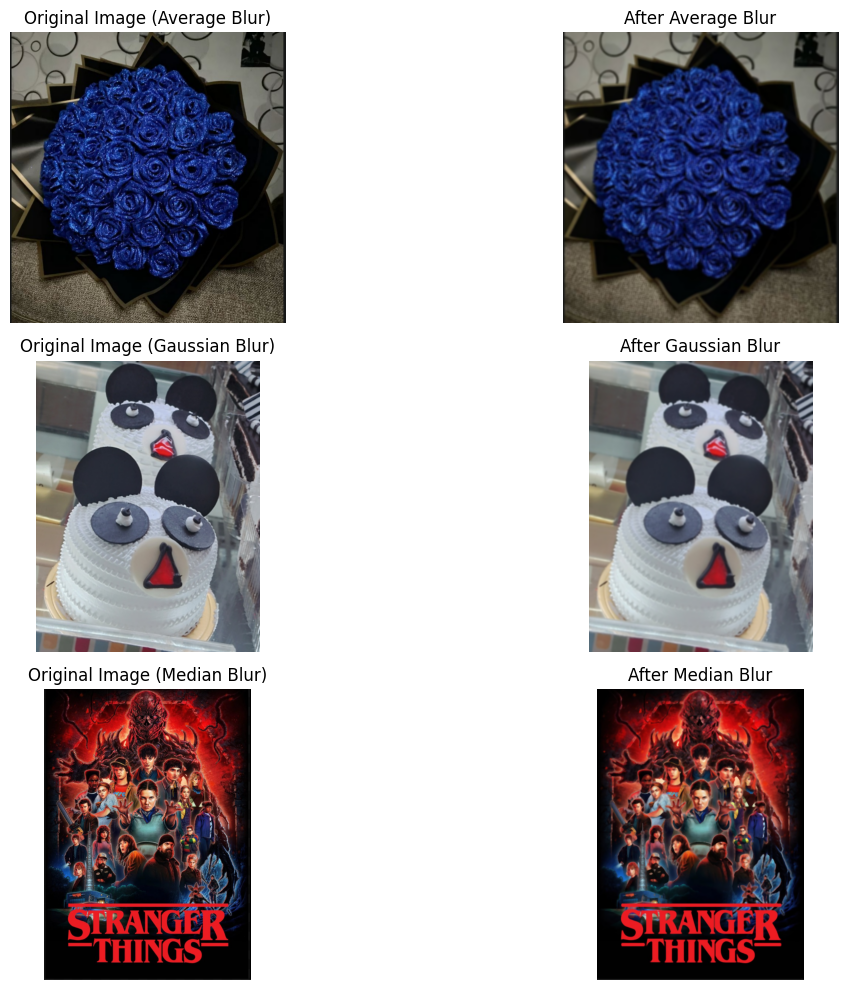

In [ ]:
# Spatial Domain Filtering - Smoothing

import cv2
import matplotlib.pyplot as plt

# ------------------------------
# Load 3 different images
# ------------------------------
img_avg = cv2.imread("/content/sample_data/Screenshot 2025-12-13 110820.png")
img_gauss = cv2.imread("/content/sample_data/Screenshot 2025-12-13 110641.png")
img_median = cv2.imread("/content/sample_data/Screenshot 2025-12-20 111233.png")

# Check loading
if img_avg is None or img_gauss is None or img_median is None:
    print("Error: One or more images not found. Check file paths!")
    exit()
# Convert BGR → RGB for correct display
img_avg_rgb = cv2.cvtColor(img_avg, cv2.COLOR_BGR2RGB)
img_gauss_rgb = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
img_median_rgb = cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB)
# ------------------------------
# Apply filters
# ------------------------------
# 1. Average Smoothing
avg_blur = cv2.blur(img_avg, (5, 5))
avg_blur_rgb = cv2.cvtColor(avg_blur, cv2.COLOR_BGR2RGB)
# 2. Gaussian Smoothing
gaussian_blur = cv2.GaussianBlur(img_gauss, (5, 5), 0)
gaussian_blur_rgb = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)
# 3. Median Smoothing
median_blur = cv2.medianBlur(img_median, 5)
median_blur_rgb = cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)
# ------------------------------
# Display Before and After for each filter
# ------------------------------
plt.figure(figsize=(14, 10))
# ----- Average Blur -----
plt.subplot(3, 2, 1)
plt.imshow(img_avg_rgb)
plt.title("Original Image (Average Blur)")
plt.axis('off')
plt.subplot(3, 2, 2)
plt.imshow(avg_blur_rgb)
plt.title("After Average Blur")
plt.axis('off')
# ----- Gaussian Blur -----
plt.subplot(3, 2, 3)
plt.imshow(img_gauss_rgb)
plt.title("Original Image (Gaussian Blur)")
plt.axis('off')
plt.subplot(3, 2, 4)
plt.imshow(gaussian_blur_rgb)
plt.title("After Gaussian Blur")
plt.axis('off')
# ----- Median Blur -----
plt.subplot(3, 2, 5)
plt.imshow(img_median_rgb)
plt.title("Original Image (Median Blur)")
plt.axis('off')
plt.subplot(3, 2, 6)
plt.imshow(median_blur_rgb)
plt.title("After Median Blur")
plt.axis('off')
plt.tight_layout()
plt.show()


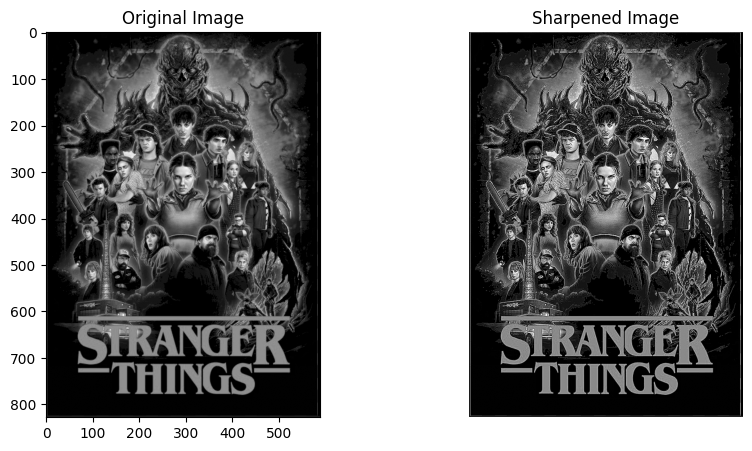

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Load image in grayscale
img = cv2.imread("/content/sample_data/Screenshot 2025-12-20 111233.png", 0)
# Sharpening kernel (simple 3x3 filter)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
# Apply sharpening
sharpened = cv2.filter2D(img, -1, kernel)
# Show original and sharpened images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('on')
plt.subplot(1,2,2)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')
plt.show()


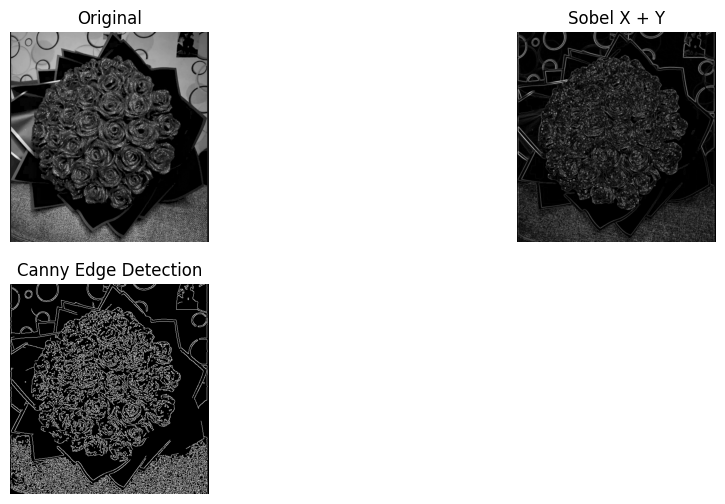

In [ ]:
#	Spatial Domain Filtering
# Edge Detection
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("/content/sample_data/Screenshot 2025-12-13 110820.png", 0)

# 1. Sobel Edge Detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # vertical edges
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) # Horizontal edges
sobel_xy = cv2.magnitude(sobel_x, sobel_y)

# 2. Canny Edge Detector
canny_edges = cv2.Canny(img, 100, 200)

# Display
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Sobel X + Y")
plt.imshow(sobel_xy, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.show()
